In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
data = pd.read_csv(r'C:\Users\singh\OneDrive\Documents\Scanned Documents\2021_registered_companies.csv')

In [15]:
data.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19-01-2021,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1500000,102000,45309,Construction
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25-01-2021,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,100000,3000,74994,Business Services
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14-01-2021,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,Public,Non-govt company,500000,500000,65990,Finance
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25-01-2021,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1000000,10000,72900,Business Services
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19-01-2021,Jan-21,Jammu & Kashmir,RoC-Jammu,Company limited by Shares,Private,Non-govt company,500000,500000,72900,Business Services


In [18]:
#Short Explaination about columns int the dataset

#Dataset consists fo all the registered companies in period of January -21 to April-21

#company_uid -> A unique id given to every comapany registered.

#date_of_registeration -> Date on which the company was registered.

#month_name -> Month on which the company was registered.

#State -> State in which the company was registered.

#roc -> The Registrar of Companies ( ROC ) is an office under the Ministry of Corporate Affairs (MCA), which is the body that deals with the administration of companies and Limited Liability Partnerships in India. Basically this column contains information about the city of ROC.

#Category -> Defines the Category of the company.

#class -> Defines class of a comapny.

#comapny_type -> define type of the comapny.

#activity_description -> Defines what business the comapny is into.



In [31]:
data.isnull().sum()

company_uid             0
month_name              0
state                   0
roc                     0
category                0
class                   0
company_type            0
authorized_capital      0
paidup_capital          0
activity_description    0
dtype: int64

As we can see that dataset has zero null values.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54894 entries, 0 to 54893
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   company_uid           54894 non-null  object
 1   date_of_registration  54894 non-null  object
 2   month_name            54894 non-null  object
 3   state                 54894 non-null  object
 4   roc                   54894 non-null  object
 5   category              54894 non-null  object
 6   class                 54894 non-null  object
 7   company_type          54894 non-null  object
 8   authorized_capital    54894 non-null  int64 
 9   paidup_capital        54894 non-null  int64 
 10  activity_code         54894 non-null  int64 
 11  activity_description  54894 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.0+ MB


In [20]:
data['authorized_capital'] = data['authorized_capital'].astype('int')
data['paidup_capital'] = data['paidup_capital'].astype('int')
data['activity_code'] = data['activity_code'].astype('int')

In [21]:
#Since date_of_registeration and activity_code is of no use to our project we drop that column

data = data.drop(['date_of_registration','activity_code'], axis = 1) 

In [22]:
#Lets find out number of Companies registered in every month.

index = data.month_name.value_counts().keys().tolist()
counts = data.month_name.value_counts().tolist()  

D:\bin\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


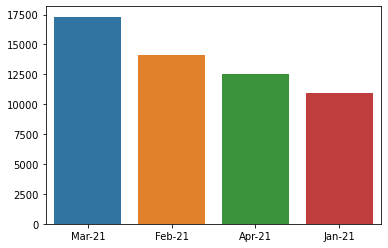

In [23]:
sns.barplot(index,counts)
plt.show()

From the above graph we can see that March 2021 has most number of companies registered and January 2021 has least companies registered.

In [25]:
data.state.unique()

array(['Telangana', 'Tamil Nadu', 'Maharashtra', 'Jammu & Kashmir',
       'Karnataka', 'Uttar Pradesh', 'Delhi', 'Madhya Pradesh', 'Gujarat',
       'Orissa', 'Rajasthan', 'Jharkhand', 'Bihar', 'Haryana', 'Kerala',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh', 'Goa',
       'Chattisgarh', 'Nagaland', 'Daman and Diu', 'Himachal Pradesh',
       'Assam', 'Punjab', 'Chandigarh', 'Dadra & Nagar Haveli', 'Manipur',
       'Andaman & Nicobar', 'Pondicherry', 'Tripura', 'Meghalaya',
       'Lakshadweep', 'MH', 'TG', 'GJ', 'CH', 'DL', 'HR', 'UP', 'RJ',
       'CT', 'KL', 'WB', 'KA', 'MP', 'PB', 'BR', 'MN', 'TN', 'OR', 'HP',
       'UR', 'JH', 'AP', 'GA', 'AS', 'DN', 'TR', 'JK', 'PY', 'MZ', 'NL',
       'AN', 'AR', 'LD', 'ML', 'LH', 'Arunachal Pradesh', 'Mizoram',
       'Ladakh'], dtype=object)

In [26]:
index = data.state.value_counts().keys().tolist()
counts = data.state.value_counts().tolist()

D:\bin\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


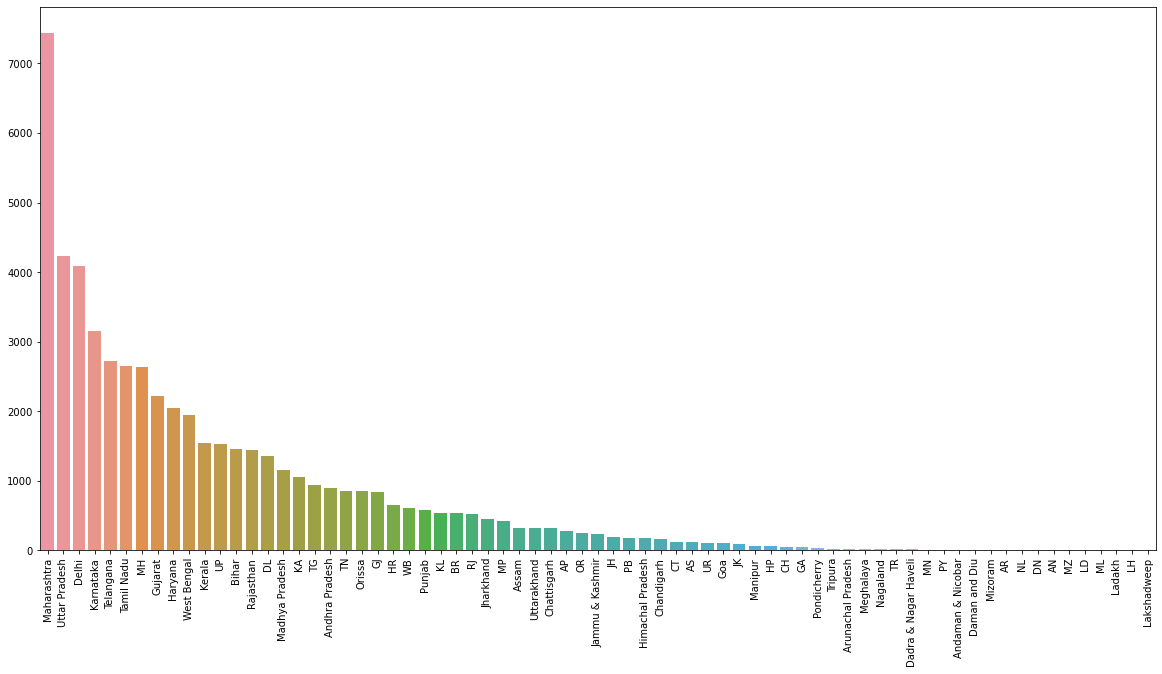

In [27]:
plt.figure(figsize= (20,10))

sns.barplot(index,counts)
plt.xticks(rotation = 90)
plt.show()

Maharashtra has highest number of companies registered in 2021.
Analysis of states havin less companies registered.

D:\bin\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


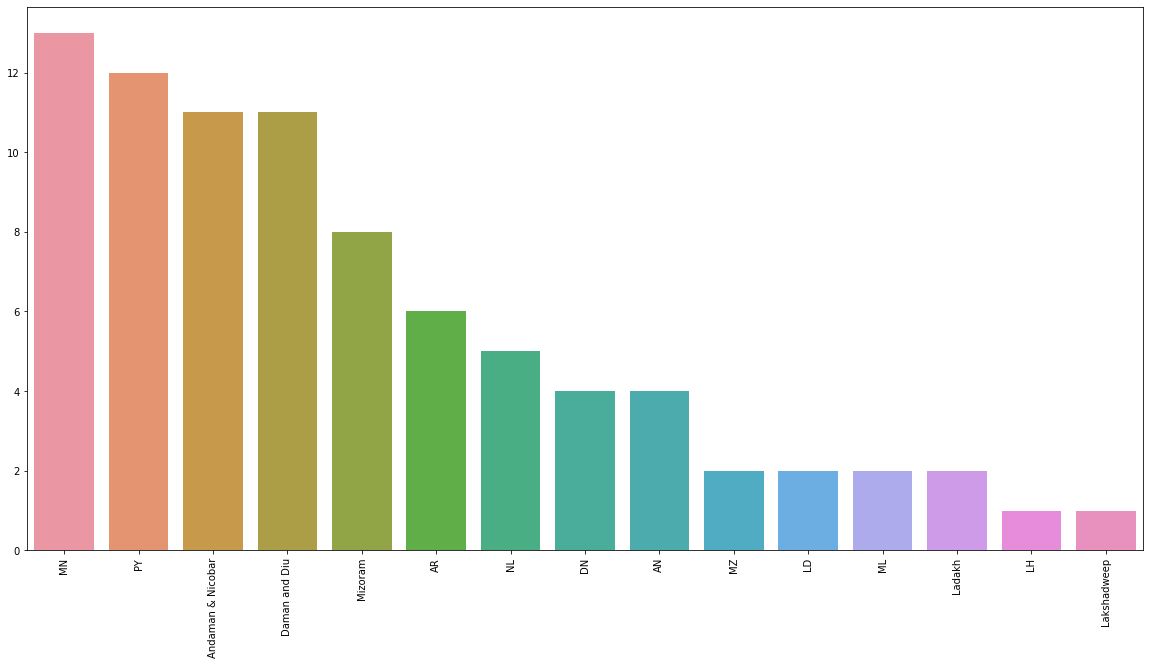

In [28]:
plt.figure(figsize= (20,10))

sns.barplot(index[-15:],counts[-15:])
plt.xticks(rotation = 90)
plt.show()

In [29]:
#Number of companies registered in month of January.


registered_jan = data[data['month_name'] == 'Jan-21'].groupby(['state']).count()
state_index = registered_jan.index.tolist()
count_jan = registered_jan['company_uid'].tolist()



D:\bin\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


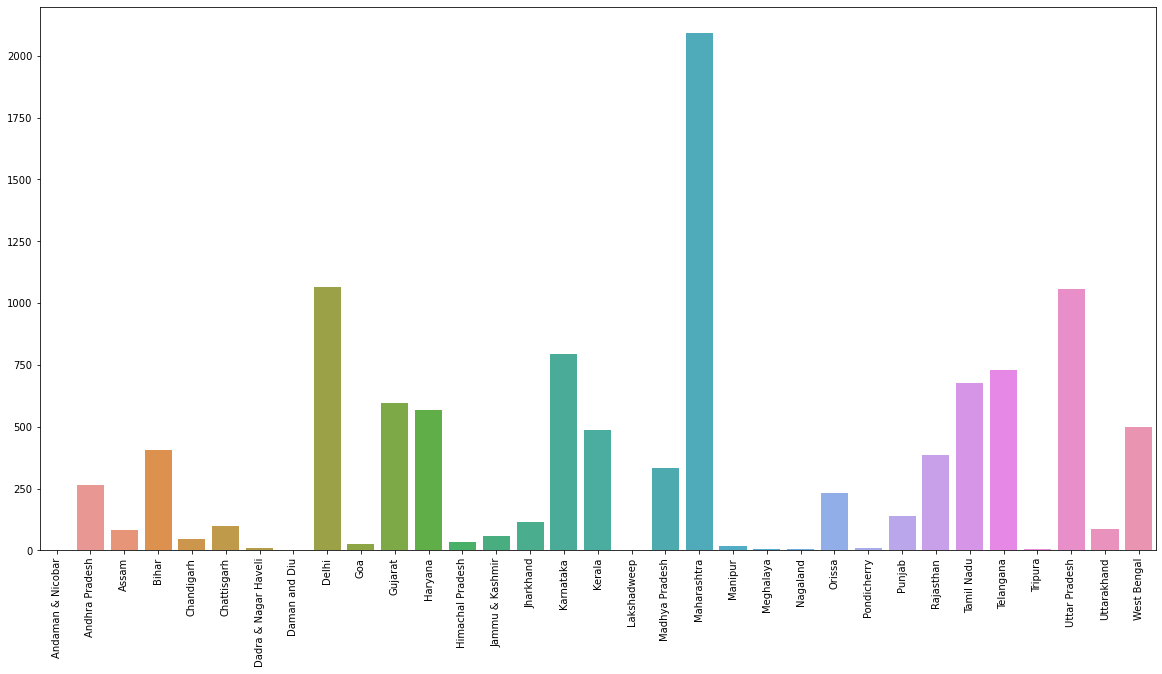

In [30]:
plt.figure(figsize= (20,10))

sns.barplot(state_index,count_jan)
plt.xticks(rotation = 90)
plt.show()